In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
##crop.corr()

In [10]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [11]:
x=df.drop('label', axis=1)
y=df['label']

In [12]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [13]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.2)

In [15]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1760 entries, 1863 to 1061
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1760 non-null   int64  
 1   P            1760 non-null   int64  
 2   K            1760 non-null   int64  
 3   temperature  1760 non-null   float64
 4   humidity     1760 non-null   float64
 5   ph           1760 non-null   float64
 6   rainfall     1760 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 110.0 KB


In [16]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440 entries, 1276 to 1263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            440 non-null    int64  
 1   P            440 non-null    int64  
 2   K            440 non-null    int64  
 3   temperature  440 non-null    float64
 4   humidity     440 non-null    float64
 5   ph           440 non-null    float64
 6   rainfall     440 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 27.5 KB


In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
y_pred=model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy score of this model is : " + str(acc*100))

Accuracy score of this model is : 99.54545454545455


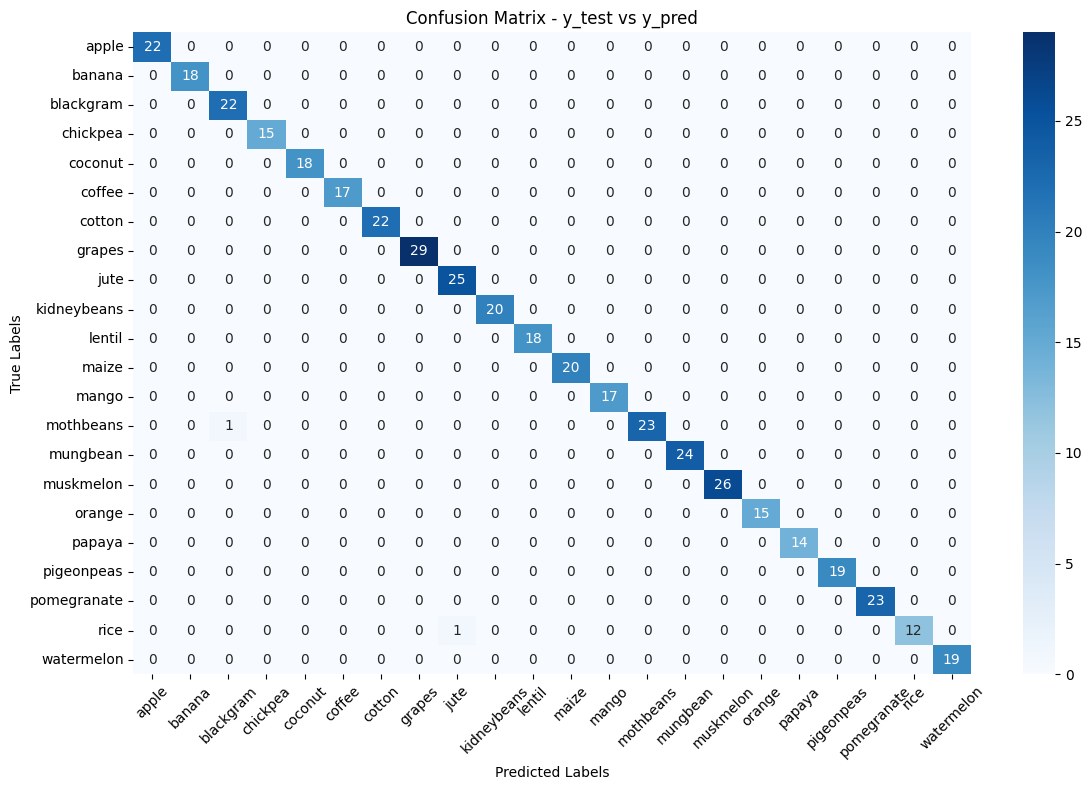

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Ensure y_test and y_pred are defined
# (e.g., from model.predict(X_test))

labels = np.unique(y_test)  # Get unique class labels
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - y_test vs y_pred')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


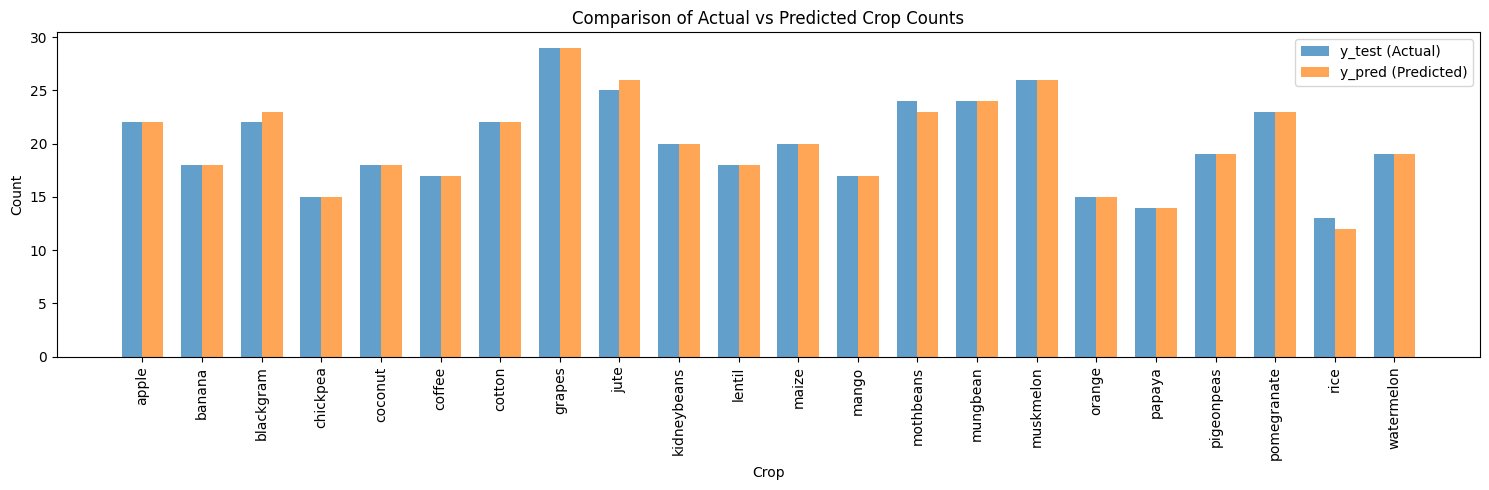

In [30]:
import pandas as pd
import numpy as np

plt.figure(figsize=(15,5))
bar_width = 0.35

# Get unique labels
labels = np.unique(np.concatenate((y_test, y_pred)))
test_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

# Sort bars according to labels (to align bar positions)
test_counts = test_counts.reindex(labels, fill_value=0)
pred_counts = pred_counts.reindex(labels, fill_value=0)

# Bar plot
plt.bar(np.arange(len(labels)), test_counts, width=bar_width, label='y_test (Actual)', alpha=0.7)
plt.bar(np.arange(len(labels))+bar_width, pred_counts, width=bar_width, label='y_pred (Predicted)', alpha=0.7)
plt.xticks(np.arange(len(labels)) + bar_width/2, labels, rotation=90)
plt.xlabel('Crop')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Crop Counts')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
import joblib

In [21]:
filename='crop app'

In [ ]:
joblib.dump(model, 'crop app')

['crop app']

In [24]:
app = joblib.load('crop app')

In [25]:
arr=[[3, 6, 13, 26.03097313, 91.50819306, 7.511755068, 101.2847738]]
y_demo = app.predict(arr)

d:\Python Projects\Crops Recommendation System\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
y_demo

array(['orange'], dtype=object)